In [17]:
import pandas as pd
import matplotlib.pyplot as plt

import pyarrow.parquet as pq
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


data = pd.read_csv('/Users/Boaz/Documents/DataMining/all_combined.csv')
data['mood'] = round(data['mood'])

In [18]:
target = []
for r in data['mood']:
    if r < 5:
        target.append(-1)
    if (r >= 5) & (r <=7):
        target.append(0)
    if r > 7:
        target.append(1)

data['target'] = target
data = data.drop('time',axis = 1)
data = data.drop('id',axis = 1)
data = data.drop('mood',axis = 1)

In [19]:
data

,days,circumplex.arousal,circumplex.valence,activity,screen,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,Total_App_Time,target
0,1,-0.250000,0.750000,0.000000,0.000000,2.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0
1,2,0.000000,0.333333,0.000000,0.000000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0
2,3,0.200000,0.200000,3.083152,17978.907000,0.0,3139.218,6280.890,1007.456,49.544,0.0,172.206,239.751,4508.500,915.445,0.000,346.118552,0.000,9420.108,0
3,4,0.600000,0.600000,3.790084,6142.161000,1.0,731.429,4962.918,93.324,21.076,0.0,0.000,98.143,439.632,37.305,0.000,117.621000,0.000,5694.347,0
4,5,0.200000,0.800000,2.141117,6773.832001,0.0,1286.246,5237.319,94.346,43.403,0.0,0.000,72.823,900.839,0.000,0.000,30.086000,30.386,6523.565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,39,-0.600000,0.400000,0.304902,4089.879001,2.0,726.391,2078.403,124.694,0.000,0.0,0.000,142.686,2010.364,0.000,0.000,56.173000,0.000,2804.794,0
1264,40,0.000000,1.200000,2.479228,14320.867998,1.0,2551.046,1936.415,614.706,0.000,0.0,357.909,529.946,5361.211,0.000,0.000,30.666000,0.000,4487.461,1
1265,41,-1.333333,1.000000,4.064507,3569.341000,1.0,400.034,435.105,136.738,0.000,0.0,0.000,29.202,1789.922,0.939,0.000,3.199000,0.000,835.139,0
1266,42,-0.800000,-0.400000,4.050925,9497.646999,0.0,3044.030,1670.842,260.220,0.000,0.0,0.000,52.610,3166.409,1052.648,8.072,232.825000,0.000,4714.872,0


In [20]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(data['target'])
# Remove the labels from the features
# axis 1 refers to the columns
features= data.drop('target', axis = 1)
# Saving feature names for later use
feature_list = list(data.columns)
# Convert to numpy array
features = np.array(features)

In [21]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 42, stratify=labels)

In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [23]:
predictions = rf.predict(X_test)

In [24]:
predictions

array([ 0.066,  0.579,  0.006,  0.107,  0.066,  0.238,  0.202,  0.251,
        0.301,  0.563,  0.534,  0.09 ,  0.601,  0.015,  0.001,  0.146,
        0.002,  0.223,  0.032,  0.525,  0.047,  0.011,  0.683,  0.005,
        0.295,  0.004,  0.027,  0.027,  0.748,  0.73 ,  0.134,  0.006,
        0.042,  0.06 ,  0.323,  0.472,  0.04 ,  0.279,  0.322,  0.899,
        0.487,  0.008,  0.017,  0.165,  0.084,  0.093,  0.385,  0.004,
        0.059,  0.003,  0.673,  0.   , -0.789,  0.073,  0.46 ,  0.02 ,
        0.912,  0.196,  0.24 ,  0.6  ,  0.384,  0.42 ,  0.413,  0.091,
        0.003,  0.121,  0.002,  0.207,  0.088,  0.132,  0.193,  0.487,
        0.428,  0.169,  0.2  ,  0.045,  0.321,  0.013,  0.31 ,  0.007,
        0.615,  0.49 ,  0.092,  0.56 ,  0.284,  0.004,  0.014,  0.305,
        0.034,  0.408,  0.025,  0.03 ,  0.347,  0.028,  0.06 ,  0.166,
        0.049,  0.3  ,  0.12 ,  0.471,  0.035,  0.11 ,  0.331,  0.901,
        0.006,  0.105,  0.029,  0.234,  0.444,  0.306,  0.298,  0.272,
      

In [27]:
accuracy_score(y_test, predictions.round())

0.7949526813880127

In [29]:
print(confusion_matrix(y_test, predictions.round()))

[[  1   1   0]
 [  0 214  19]
 [  0  45  37]]


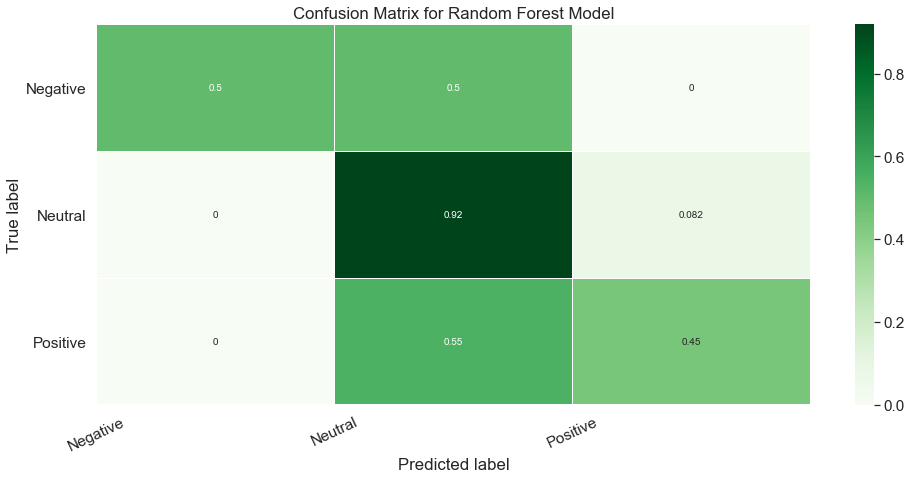

In [33]:
import seaborn as sns
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, predictions.round())
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Negative', 'Neutral', 'Positive']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [35]:
print(classification_report(y_test, predictions.round()))

              precision    recall  f1-score   support

          -1       1.00      0.50      0.67         2
           0       0.82      0.92      0.87       233
           1       0.66      0.45      0.54        82

    accuracy                           0.79       317
   macro avg       0.83      0.62      0.69       317
weighted avg       0.78      0.79      0.78       317

